# <h1 style="font-family: Trebuchet MS; padding: 12px; font-size: 48px; text-align: center; line-height: 1.25;"><b>!!Analisis Sentimen Terhadap Film Menggunakan Algoritma Naive Bayes!!<span style="color: #000000"></span></b><br><span style="color: #6fa3a7; font-size: 24px">Insight 3</span></h1>
<hr>

Nama Kelompok :
- Tiara Auliya Putri
- Gusti Made Wijaya Kusuma
- Stephania Getrudis Inaconta Sadipun
- I Gusti Ketut Adi Triyoga Putra
- Farhan Rahman

# 1. Data Acquisition 
Data yang digunakan adalah dataset bernama dataset_tweet_sentiment_opini_film.csv yang didalamnya berisi 200 baris dan 3 kolom. 3 kolom tersebut adalah Id, Sentiment dan Text Tweet. Sentiment disini sebrperan sebagai variabel y dan Text Tweet sebagai variabel x.

In [1]:
#Mengimport library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

%matplotlib inline

In [2]:
#Mengimport NLTK dimana didalamnya berisi stopword yang akan digunakan untuk text preprocessing
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Punni\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
# Mendownload dataset
dataset = pd.read_csv('dataset_tweet_sentiment_opini_film.csv')
dataset

,Id,Sentiment,Text Tweet
0,1,negative,Jelek filmnya... apalagi si ernest gak mutu bg...
1,2,negative,Film king Arthur ini film paling jelek dari se...
2,3,negative,@beexkuanlin Sepanjang film gwa berkata kasar ...
3,4,negative,Ane ga suka fast and furious..menurutku kok je...
4,5,negative,"@baekhyun36 kan gua ga tau film nya, lu bilang..."
...,...,...,...
195,196,positive,Fargo juga adaptasi dari film yang cukup berha...
196,197,positive,637.000 waw ini sangat keren flm horor dng jum...
197,198,positive,@filmziarah film yang tenang dan menghanyutkan...
198,199,positive,Film yg amat menarik. Kisah cinta & kesetiaan ...


Dataset diatas berisi 200 baris dengan 3 kolom yang memiliki 2 sentimen yaitu positive dan negative

In [4]:
#menampilkan info dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Id          200 non-null    int64 
 1   Sentiment   200 non-null    object
 2   Text Tweet  200 non-null    object
dtypes: int64(1), object(2)
memory usage: 4.8+ KB


In [5]:
#Menampilkan jumlah semua sentimen dan jumlah sentimen negative dan positive
print('Total Jumlah Sentimen :', dataset.shape[0], 'data\n')
print('terdiri dari (label):')
print('1. Sentiment Negative  :', dataset[dataset.Sentiment == "negative"].shape[0], 'data')
print('2. Sentiment Positive  :', dataset[dataset.Sentiment == "positive"].shape[0], 'data')

Total Jumlah Sentimen : 200 data

terdiri dari (label):
1. Sentiment Negative  : 100 data
2. Sentiment Positive  : 100 data


Pada output terlihat bahwa jumlah sentimen ada 200 dengan pembagian yang merata antara sentimen negative dan positive yaitu 100 dan 100.

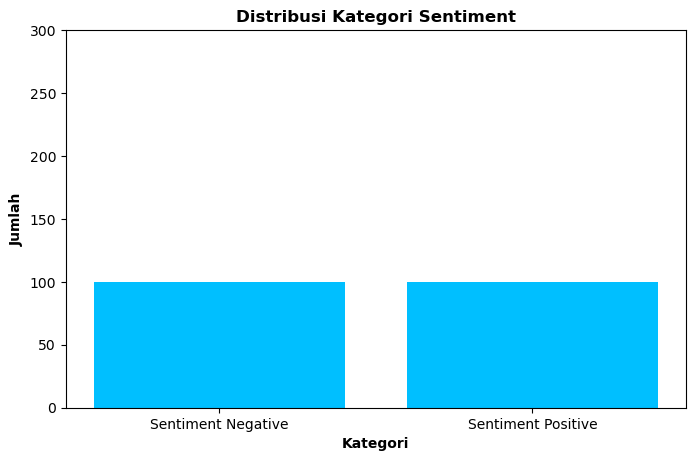

In [6]:
#Menampilkan visualisasi pembagian jumlah sentimen untuk negative dan positive
height = dataset['Sentiment'].value_counts()
labels = ('Sentiment Negative', 'Sentiment Positive')
y_pos = np.arange(len(labels))

plt.figure(figsize=(8,5), dpi=100)
plt.ylim(0,300)
plt.title('Distribusi Kategori Sentiment', fontweight='bold')
plt.xlabel('Kategori', fontweight='bold')
plt.ylabel('Jumlah', fontweight='bold')
plt.bar(y_pos, height, color=['deepskyblue'])
plt.xticks(y_pos, labels)
plt.show()

Pada output terlihat bahwa pembagian antar sentimennya rata.

# 2. Text Preprocessing

## 2.1 Case Folding

In [7]:
#Membuat function untuk melakukan case folding
import re
def casefolding(text):
  text = text.lower()                               # Mengubah teks menjadi lower case
  text = re.sub(r'https?://\S+|www\.\S+', '', text) # Menghapus URL
  text = re.sub(r'[-+]?[0-9]+', '', text)           # Menghapus angka
  text = re.sub(r'[^\w\s]','', text)                # Menghapus karakter tanda baca
  text = text.strip()
  return text

In [8]:
raw_sample = dataset['Text Tweet'].iloc[10]
case_folding = casefolding(raw_sample)

print('Raw data\t: ', raw_sample)
print('\n')
print('Case folding\t: ', case_folding)

Raw data	:  film jelek, jelas. Ga ada isinya. 


Case folding	:  film jelek jelas ga ada isinya


Text processing yang pertama dilakukan adalah case folding yang bertujuan untuk membersihkan sentimen yakni dengan mengubahkan ke huruf kecil sehingga semua sentimen menjadi sama, lalu mengubah menghapus URL, menghapus angka dan menghapus karakter tanda baca. Pada ouput terlihat bahwa raw data sudah dibersihkan dengan menggunakan function casefolding.

## 2.2. Word Normalization


In [9]:
# Mendownload corpus kumpulan slangwords 
key_norm = pd.read_csv('https://raw.githubusercontent.com/ksnugroho/klasifikasi-spam-sms/master/data/key_norm.csv')
print(key_norm.head(10))

key_norm.shape

   _id      singkat       hasil
0    1         abis       habis
1    2       accent     tekanan
2    3       accept      terima
3    4     accident  kecelakaan
4    5  achievement    prestasi
5    6         acra       acara
6    7       acrany    acaranya
7    8       acrnya    acaranya
8    9       action        aksi
9   10       active       aktif


(3720, 3)

In [10]:
# Membuat fucntion untuk normalisasi teks dengan nama textnormalize
def textnormalize(text):
  text = ' '.join([key_norm[key_norm['singkat'] == word]['hasil'].values[0] if (key_norm['singkat'] == word).any() else word for word in text.split()])
  text = str.lower(text)
  return text

Text preprocessing kedua yakni melakukan word normalization, dimana ini dilakukan dengan mendownload corpus slangword sehingga dapat dipakai untuk untuk mengubah kata gaul atau kata tidak baku menjadi kata baku yang nantinya digunakan pada function textnormalize. Pada output ditampilkan beberapa sample perubahan kata, misalnya kata abis akan diubah menjadi habis.

## 2.3. Filtering (Stopword Removal)

In [11]:
# Mengimport corpus stopword bahasa indonesia dan bahasa inggris
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

stopwords_ind = stopwords.words('indonesian')
stopwords_eng = stopwords.words('english')

In [12]:
# Melihat jumlah kata dalam corpus stopword bahasa indonsia
len(stopwords_ind)

758

In [13]:
# Melihat jumlah kata dalam corpus stopword bahasa inggris
len(stopwords_eng)

179

In [14]:
# stopword bahasa indoensia
stopwords_ind[:1000]

['ada',
 'adalah',
 'adanya',
 'adapun',
 'agak',
 'agaknya',
 'agar',
 'akan',
 'akankah',
 'akhir',
 'akhiri',
 'akhirnya',
 'aku',
 'akulah',
 'amat',
 'amatlah',
 'anda',
 'andalah',
 'antar',
 'antara',
 'antaranya',
 'apa',
 'apaan',
 'apabila',
 'apakah',
 'apalagi',
 'apatah',
 'artinya',
 'asal',
 'asalkan',
 'atas',
 'atau',
 'ataukah',
 'ataupun',
 'awal',
 'awalnya',
 'bagai',
 'bagaikan',
 'bagaimana',
 'bagaimanakah',
 'bagaimanapun',
 'bagi',
 'bagian',
 'bahkan',
 'bahwa',
 'bahwasanya',
 'baik',
 'bakal',
 'bakalan',
 'balik',
 'banyak',
 'bapak',
 'baru',
 'bawah',
 'beberapa',
 'begini',
 'beginian',
 'beginikah',
 'beginilah',
 'begitu',
 'begitukah',
 'begitulah',
 'begitupun',
 'bekerja',
 'belakang',
 'belakangan',
 'belum',
 'belumlah',
 'benar',
 'benarkah',
 'benarlah',
 'berada',
 'berakhir',
 'berakhirlah',
 'berakhirnya',
 'berapa',
 'berapakah',
 'berapalah',
 'berapapun',
 'berarti',
 'berawal',
 'berbagai',
 'berdatangan',
 'beri',
 'berikan',
 'berikut'

In [15]:
# stopword bahasa inggris
stopwords_eng[:1000]

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [16]:
# Membuat fungsi untuk stopword removal dengan nama remove_stopword
# Terdapat juga more_stopword yang memungkinkan developer memberikan kata-kata yang ingin dihapus yang belum terdaftar pada corpus
more_stopword = ['gwa', 'kok', 'ah', 'kebayang', 'ttg', 'ya', 'yah', 'duh', 'tll', 'sih', 'keingat', 'ogah', 'greget', 'lumyan', 'bgus', 'kaya', 'nntn', 'diharepin', 'nungguin', 'ma', 'nih', 'ajaa', 'nyedot', 'mbuh', 'dah', 'bingittsss', 'terllu', 'kentel', 'gegara']                    # Tambahkan kata lain dalam daftar stopword
stopwords_ind = stopwords_ind + more_stopword

def remove_stop_words(text):
  clean_words = []
  text = text.split()
  for word in text:
      if word not in stopwords_ind:
          clean_words.append(word)
  return " ".join(clean_words)

In [17]:
# Menerapkan stopword removal dan text normalize pada sentimen yang sudah dilakukan case folding
raw_sample = dataset['Text Tweet'].iloc[10]
case_folding = casefolding(raw_sample)
stopword_removal = remove_stop_words(case_folding)
text_normalize = textnormalize(stopword_removal)


print('Raw data             : ', raw_sample)
print('\n')
print('Case folding         : ', case_folding)
print('\n')
print('Stopword removal     : ', stopword_removal)
print('\n')
print('Text Normalize       : ', text_normalize)
print('\n')

Raw data             :  film jelek, jelas. Ga ada isinya. 


Case folding         :  film jelek jelas ga ada isinya


Stopword removal     :  film jelek ga isinya


Text Normalize       :  film jelek tidak isinya




Text preprocessing selanjutnya adalah stopword removal. Stopword removal digunakan untuk menghapus kata-kata yang tidak penting seperti konjugasi, kata hubung dan kata-kata tidak penting lainnya yang terdapat pada dataset. Pada output, dapat dilihat bahwa setelah diterapkan text normalize dan stowprd removal, kata-kata yang tidak baku sudah di handle dan juga beberapa kata tidak penting seperti kata 'namun' sudah dihapus

## 2.4. Stemming

In [18]:
# Membuat function stemming 
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stemming(text):
  text = stemmer.stem(text)
  return text

In [19]:
# Menerapkan stemming ke sentimen yang sebelumnya telah diterapkan case folding, stopword removal dan text normalize,
raw_sample = dataset['Text Tweet'].iloc[10]
case_folding = casefolding(raw_sample)
stopword_removal = remove_stop_words(case_folding)
text_normalize = textnormalize(stopword_removal)
text_stemming = stemming(text_normalize)

print('Raw data\t\t: ', raw_sample)
print('\n')
print('Case folding\t\t: ', case_folding)
print('\n')
print('Stopword removal\t: ', stopword_removal)
print('\n')
print('Text Normalize\t\t: ', text_normalize)
print('\n')
print('Stemming\t\t: ', text_stemming)

Raw data		:  film jelek, jelas. Ga ada isinya. 


Case folding		:  film jelek jelas ga ada isinya


Stopword removal	:  film jelek ga isinya


Text Normalize		:  film jelek tidak isinya


Stemming		:  film jelek tidak isi


Text preprocessing yang terakhir adalah stemming yaitu mengubah kata imbuhan menjadi kata dasar. Dapat dilihat pada output bahwa setelah diterapkan stemming kata yang berimbuha sudah berubah ke kata dasarnya, misalnya 'dilupakan' berubah menjadi 'lupa'. Perubahan ini diperlukan sehingg tidak terlalu banyak kata (feature) pada text, misalnya kata kerja hanya 1 tetapi jika tidak diubah ke kata dasar, maka akan ada banyak kata misalnya bekerja, pekerjaan, mempekerjakan, dan lain-lain.

## 2.5. Gabungan Seluruh Text Preprocessing

In [20]:
# Membuat function untuk menggabungkan seluruh text preprocessing
def text_preprocessing_process(text):
  text = casefolding(text)
  text = textnormalize(text)
  text = remove_stop_words(text)
  text = stemming(text)
  return text

In [21]:
# Menyimpan data teks yang sudah bersih 

%time
dataset['Clean Text Sentiment Film'] = dataset['Text Tweet'].apply(text_preprocessing_process)

CPU times: total: 0 ns
Wall time: 20 µs


In [22]:
dataset

,Id,Sentiment,Text Tweet,Clean Text Sentiment Film
0,1,negative,Jelek filmnya... apalagi si ernest gak mutu bg...,jelek film si ernest mutu banget actingnya fil...
1,2,negative,Film king Arthur ini film paling jelek dari se...,film king arthur film jelek cerita king arthur
2,3,negative,@beexkuanlin Sepanjang film gwa berkata kasar ...,beexkuanlin film kasar bapak
3,4,negative,Ane ga suka fast and furious..menurutku kok je...,suka fast and furiousmenurutku jelek film
4,5,negative,"@baekhyun36 kan gua ga tau film nya, lu bilang...",baekhyun tau film nya bilang perang perang per...
...,...,...,...,...
195,196,positive,Fargo juga adaptasi dari film yang cukup berha...,fargo adaptasi film hasil season nya the best
196,197,positive,637.000 waw ini sangat keren flm horor dng jum...,waw keren flm horor tonton gin prillybie danur...
197,198,positive,@filmziarah film yang tenang dan menghanyutkan...,filmziarah film tenang hanyut salut mbah ponco...
198,199,positive,Film yg amat menarik. Kisah cinta & kesetiaan ...,film tarik kisah cinta setia saji bikin kangen...


In [23]:
# Menyimpan data yang telah dilakukan seluruh text preprocessing agar kita kita tidak perlu menjalankan ulang proses tersebut dari awal
dataset.to_csv('clean_text_sentimen_film.csv')

# 3. Feature Engineering

In [24]:
# Memisahkan variabel x (kolom feature) dan variabel y (kolom target)
X = dataset['Text Tweet']
y = dataset['Sentiment']

In [25]:
# Menampilkan isi variabel x
X

0      Jelek filmnya... apalagi si ernest gak mutu bg...
1      Film king Arthur ini film paling jelek dari se...
2      @beexkuanlin Sepanjang film gwa berkata kasar ...
3      Ane ga suka fast and furious..menurutku kok je...
4      @baekhyun36 kan gua ga tau film nya, lu bilang...
                             ...                        
195    Fargo juga adaptasi dari film yang cukup berha...
196    637.000 waw ini sangat keren flm horor dng jum...
197    @filmziarah film yang tenang dan menghanyutkan...
198    Film yg amat menarik. Kisah cinta & kesetiaan ...
199    Nntn @filmziarah , film bagus, ada kali 5 meni...
Name: Text Tweet, Length: 200, dtype: object

In [26]:
# Menampilkan isi variabel y
y

0      negative
1      negative
2      negative
3      negative
4      negative
         ...   
195    positive
196    positive
197    positive
198    positive
199    positive
Name: Sentiment, Length: 200, dtype: object

## 3.1. Feature Extraction (TF-IDF & N-Gram)

In [27]:
# Mengimplementasikan feature extraction menggunakan TF-IDF dengan memanfaatkan library python
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf = TfidfVectorizer(ngram_range=(1,1))
tf_idf.fit(X)

TfidfVectorizer()

In [28]:
# Melihat jumlah fitur yang akan dilakukan TF-IDF
print(len(tf_idf.get_feature_names_out()))

1172


In [29]:
# Melihat fitur-fitur apa saja yang ada di dalam corpus
print(tf_idf.get_feature_names_out())

['000' '10' '13' ... 'youtube' 'yuk' 'ziarah']


In [30]:
# Melihat matriks jumlah token
# Data ini siap untuk dimasukkan dalam proses pemodelan (machine learning)

X_tf_idf = tf_idf.transform(X).toarray()
X_tf_idf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [31]:
# Melihat matriks jumlah token menggunakan TF-IDF
# Data ini siap untuk dimasukkan dalam proses pemodelan (machine learning)
# Selanjutnya X_tf_idf (data featurenya) dilakukan perubahan kata menjadi vektor lalu disimpan pada variabel baru bernama 'data_tf_idf'

data_tf_idf = pd.DataFrame(X_tf_idf, columns=tf_idf.get_feature_names_out())
data_tf_idf

,000,10,13,13szi5lbc,15,18,1982,1uxomgqjs,20,2010,...,yakin,yang,yanskii,yaoi,yg,you,youtu,youtube,yuk,ziarah
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.241932,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.155417,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
196,0.258935,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
197,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.117742,0.0,0.000000,0.115476,0.0,0.0,0.0,0.0,0.0
198,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.247361,0.0,0.0,0.0,0.0,0.0


Ini adalah proses perubahan kata menjadi vektor dengan menggunakan TF-IDF yang ada pada library python. Kata-kata yang diubah berada pada variabel x yang mana terdapat 1172 dalam corpus TF-IDF yang akan diubah menjadi vektor. Setelah diubah, hasil selanjutnya ditampilkan dalam bentuk data frame.

In [32]:
# Data teks yang sudah berubah menjadi vektor akan disimpan pada file pickle
with open('tf_idf_feature_sentimen.pickle', 'wb') as output:
  pickle.dump(X_tf_idf, output)

## 3.2. Feature Selection (Chi Square)

In [33]:
# Mengubah nilai data tabular TF-IDF menjadi array agar dapat dijalankan pada proses seleksi fitur
X = np.array(data_tf_idf)
y = np.array(y)

In [34]:
# Mengimplementasikan feature selection (pengurangan feature) dengan menggunakan chi-square (melihat score setiap feature)
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import chi2 

chi2_features = SelectKBest(chi2, k=1100)  # mengambil 1100 feature yang paling bagus (scorenya tinggi)
X_kbest_features = chi2_features.fit_transform(X, y) # 1100 feature pada variabel x yang terpilih akan masuk pada variabel 'X_kbest_feature'
   
print('Jumlah keseluruhan feature\t\t     :', X.shape[1]) 
print('Jumlah feature setelah mengalami pengurangan :', X_kbest_features.shape[1]) 

Jumlah keseluruhan feature		     : 1172
Jumlah feature setelah mengalami pengurangan : 1100


Pada bagian ini, feature sudah selesai dicut atau dikurangi sehingga yang digunakan hanya 1100 feature saja, tetapi dibawahnya akan saya tampilkan bagaimana chi-square mengurangi featurenya. Chi-square mengurasngi feature dengan cara mengurutkan setiap feature berdasarkan scorenya, lalu mengambil 1100 feature teratas (1100 feature dengan score terbesar).

In [66]:
# chi2_features.scores_ adalah nilai chi-square, semakin tinggi nilainya maka semakin baik fiturnya
data_chi2 = pd.DataFrame(chi2_features.scores_, columns=['Score'])

# Menampilkan fitur beserta nilainya
feature = tf_idf.get_feature_names_out()
data_chi2['Feature'] = feature
data_chi2

,Score,Feature
0,0.516227,000
1,0.568011,10
2,0.292374,13
3,0.231656,13szi5lbc
4,0.282045,15
...,...,...
1167,0.235372,you
1168,0.292374,youtu
1169,0.292374,youtube
1170,0.292901,yuk


In [67]:
# Mengurutkan fitur terbaik
data_chi2.sort_values(by='Score', ascending=False)

,Score,Feature
536,4.144326e+00,keren
460,4.138690e+00,jelek
512,4.045071e+00,kecewa
576,2.892682e+00,kurang
403,2.668290e+00,hambar
...,...,...
568,1.886462e-05,krn
988,1.514053e-05,sih
897,3.554873e-06,sabar
604,7.746139e-07,lo


In [68]:
# Menampilkan mask pada feature yang diseleksi
# False berarti feature tidak terpilih dan True berarti feature terpilih
mask = chi2_features.get_support()
mask

array([ True,  True,  True, ...,  True,  True,  True])

1100 feature yang sudah terpilih akan digabungkan dengan corpus pada vocab yang terbentuk dari feature extraction kita yang akan disimpan pada variabel mask, caranya dengan penentuan true false pada vocab yang terbentuk dari feature extraction, dimana false berarti feature tidak terpilih dan true berarti feature terpilih.

In [69]:
# Menampilkan fitur-fitur terpilih berdasarkan mask atau nilai tertinggi yang sudah dikalkulasi pada chi-square
new_feature = []

for bool, f in zip(mask, feature):
  if bool:
    new_feature.append(f)
  selected_feature = new_feature

selected_feature

['000',
 '10',
 '13',
 '13szi5lbc',
 '15',
 '18',
 '1982',
 '1uxomgqjs',
 '20',
 '2010',
 '2017',
 '207',
 '21theguysquiz',
 '22',
 '2o2irpy',
 '41',
 '46i52na21l',
 '4_oaoo',
 '637',
 '690',
 '6tqqdgglj',
 '90',
 '95',
 'abiss',
 'acclaim',
 'actingnya',
 'action',
 'ada',
 'adaptasi',
 'adegan',
 'adinia',
 'aduh',
 'aduk',
 'after',
 'agak',
 'agama',
 'ah',
 'air',
 'aj',
 'aja',
 'ajaa',
 'akan',
 'akhir',
 'akhirnya',
 'akhrnya',
 'akting',
 'aktingnya',
 'aktor',
 'aktornya',
 'aktrisnya',
 'aku',
 'ale',
 'alien',
 'alitalit_',
 'alur',
 'ama',
 'amat',
 'amazing',
 'ambigu',
 'amira',
 'an',
 'anak',
 'ancur',
 'and',
 'anda',
 'andibowooo',
 'ane',
 'aneh',
 'anjlok',
 'anya',
 'apa',
 'apa2',
 'apalagi',
 'april',
 'arah',
 'arthur',
 'artinya',
 'artis',
 'asih',
 'asik',
 'askmenfess',
 'asli',
 'astagah',
 'auratmu',
 'awal',
 'awalnya',
 'awisuryadi',
 'baekhyun36',
 'bagi',
 'bagian',
 'bagus',
 'bagussss',
 'bahagia',
 'bahas',
 'bahasa',
 'bahwa',
 'bajakan',
 'bakal'

Pada saat diseleksi, jika feature bernilai true, maka feature tersebut akan dipilih dan dimasukan ke dalam variabel 'new_feature' dan yang tidak terpilih akan bernilai false dan tidak akan digunakan.

In [70]:
# Cara melihat vocab yang dihasilkan oleh TF_IDF
# tf_idf.vocabulary_ 

kbest_feature = {} # Buat dictionary kosong untuk menyimpan feature terpilih

#perulangan untuk mengecek setiap feature yang dihasilkan TF-IDF, kemudian akan dicek apakah feature tersebut ada di dalam daftar feature terseleksi, kalau ada, maka akan dimasukan ke dalam dictionary kosong
for (k,v) in tf_idf.vocabulary_.items():    
  if k in selected_feature:                 
    kbest_feature[k] = v                    

Feature-feature yang dipilih tersebut akan masuk ke dalam dictionary kosong dengan nama kbest_feature.

In [71]:
# Menampilkan feature-feature yang terpilih beserta score TF-IDF nya
kbest_feature

{'jelek': 460,
 'filmnya': 358,
 'apalagi': 77,
 'si': 987,
 'ernest': 340,
 'mutu': 721,
 'actingnya': 27,
 'film': 355,
 'sampah': 907,
 'king': 548,
 'arthur': 80,
 'ini': 439,
 'paling': 785,
 'seluruh': 957,
 'beexkuanlin': 123,
 'gwa': 399,
 'berkata': 148,
 'kasar': 496,
 'terus': 1077,
 'pada': 781,
 'bapaknya': 117,
 'ane': 71,
 'ga': 364,
 'suka': 1021,
 'and': 68,
 'menurutku': 686,
 'kok': 560,
 'tu': 1124,
 'baekhyun36': 94,
 'kan': 489,
 'gua': 394,
 'tau': 1039,
 'nya': 767,
 'lu': 612,
 'bilang': 171,
 'perang': 825,
 'perangan': 826,
 'an': 65,
 'disebut': 295,
 'ama': 60,
 'rp': 891,
 'yaoi': 1165,
 'jadi': 450,
 'ambigu': 63,
 'tolong': 1110,
 'editingnya': 322,
 'bagus': 97,
 'saya': 916,
 'sering': 973,
 'kecewa': 512,
 'dgn': 264,
 'indonesia': 438,
 'ditunggu': 302,
 'salah': 901,
 'satu': 913,
 'aktornya': 52,
 'ternyata': 1071,
 'pendukung': 813,
 'penista': 819,
 'agama': 39,
 'ah': 40,
 'harus': 414,
 'bersabar': 154,
 'tak': 1033,
 'menonton': 684,
 'parah':

In [72]:
# Menampilkan feature-feature yang sudah diseleksi (1100) beserta nilai vektornya (hasil dari TF-IDF) pada keseluruhan data untuk dijalankan pada proses machine learning
data_selected_feature = pd.DataFrame(X_kbest_features, columns=selected_feature)
data_selected_feature

,000,10,13,13szi5lbc,15,18,1982,1uxomgqjs,20,2010,...,yah,yakin,yang,yanskii,yaoi,you,youtu,youtube,yuk,ziarah
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.241932,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.155417,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
196,0.258935,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
197,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.117742,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
198,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


Dapat pada output diatas, feature yang sebelumnya berjumlah 1172 sudah berkurang menjadi 1100 dan kita bisa melihat bahwa setiap feature sudah memiliki vektornya masing-masing.

In [73]:
with open('selected_feature.pickle', 'wb') as output:
  pickle.dump(kbest_feature, output)

# 4. Modelling (Machine Learning)

In [74]:
# Mengimport algoritma-algoritma yang akan digunakan untuk klasifikasi dari library python
from sklearn.naive_bayes import MultinomialNB        # naive bayes        
from sklearn.model_selection import train_test_split    # Digunakan untuk memisahkan data uji dan data latih
from joblib import dump                                 # Digunakan untuk menyimpan model yang telah dilatih

In [75]:
# Mmeisahkan data training dan testing dengan perbandingan 80% untuk data training, 20% untuk data uji
# Random_state digunakan untuk internal random generator

X_train, X_test, y_train, y_test = train_test_split(X_kbest_features, y, test_size=0.20, random_state=40)

# 4.1. Implementasi Algoritma Naive Bayes

In [76]:
# Mengimplementasikan algoritma naive bayes
algorithm = MultinomialNB()               
model = algorithm.fit(X_train, y_train)    

# Menyimpan model hasil traning
dump(model, filename='model.joblib')

['model.joblib']

In [77]:
# Melakukan prediksi pada data trainig dengan algoritma naive bayes
model_pred = model.predict(X_test) 

# Tampilkan hasil prediksi label dari model
model_pred

array(['negative', 'negative', 'positive', 'negative', 'positive',
       'positive', 'negative', 'positive', 'negative', 'positive',
       'positive', 'positive', 'positive', 'negative', 'negative',
       'positive', 'positive', 'negative', 'positive', 'negative',
       'negative', 'negative', 'negative', 'negative', 'negative',
       'negative', 'negative', 'positive', 'positive', 'positive',
       'negative', 'negative', 'negative', 'positive', 'positive',
       'positive', 'negative', 'positive', 'negative', 'positive'],
      dtype='<U8')

In [78]:
# Tampilkan label sebenarnya pada data testing 
y_test

array(['negative', 'negative', 'positive', 'negative', 'positive',
       'positive', 'negative', 'positive', 'negative', 'positive',
       'positive', 'positive', 'positive', 'negative', 'negative',
       'positive', 'positive', 'negative', 'positive', 'negative',
       'positive', 'negative', 'negative', 'negative', 'positive',
       'negative', 'negative', 'positive', 'positive', 'positive',
       'negative', 'negative', 'positive', 'positive', 'negative',
       'positive', 'negative', 'positive', 'negative', 'positive'],
      dtype=object)

# 5. Model Evaluation

In [79]:
# Menampilkan jumlah prediksi yang benar dan prediksi yang salah dari data testing beserta akurasinya

print("Naive Bayes")
prediksi_benar = (model_pred == y_test).sum()
prediksi_salah = (model_pred != y_test).sum()
print('Jumlah prediksi benar\t:', prediksi_benar)
print('Jumlah prediksi salah\t:', prediksi_salah)
accuracy = prediksi_benar / (prediksi_benar + prediksi_salah)*100
print('Akurasi pengujian\t:', accuracy, '%')
print('\n')

Naive Bayes
Jumlah prediksi benar	: 36
Jumlah prediksi salah	: 4
Akurasi pengujian	: 90.0 %




In [80]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, model_pred2)
print('Confusion matrix:\n', cm)
print('\n')

Confusion matrix:
 [[18  1]
 [ 3 18]]




In [81]:
from sklearn.metrics import classification_report

print('Classification report:\n', classification_report(y_test, model_pred))

Classification report:
               precision    recall  f1-score   support

    negative       0.86      0.95      0.90        19
    positive       0.95      0.86      0.90        21

    accuracy                           0.90        40
   macro avg       0.90      0.90      0.90        40
weighted avg       0.90      0.90      0.90        40



In [82]:
# naive bayes

from sklearn.model_selection import ShuffleSplit    
from sklearn.model_selection import cross_val_score 

cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=50)

cv_accuracy2 = (cross_val_score(model2, X_kbest_features, y, cv=cv, scoring='accuracy'))
avg_accuracy2 = np.mean(cv_accuracy2)

print('Akurasi setiap split:', cv_accuracy2)
print('Rata-rata akurasi pada cross validation:', avg_accuracy2, '\n', '\n')

Akurasi setiap split: [0.9   0.875 0.9   0.725 0.875 0.9   0.925 0.875 0.9   0.9  ]
Rata-rata akurasi pada cross validation: 0.8775000000000001 
 



# 6. Deployment
Mencoba mengimplementasikan klasifikasi sentimen dengan algoritma naive bayes.

In [83]:
from joblib import load

# load model naive bayes
model = load('model.joblib')

# load vocabulary dari TF_idf yang sebelumnya sudah dimasukan ke dalam pickle file
vocab = pickle.load(open('selected_feature.pickle', 'rb'))

In [84]:
# Uji coba model
input_text = input("Masukan Text : ") 

pre_input_text = text_preprocessing_process(input_text)   # lakukan text pre processing pada text input

tf_idf_vec = TfidfVectorizer(vocabulary=set(vocab))       # definisikan TF_IDF

result = model.predict(tf_idf_vec.fit_transform([pre_input_text]))  # Lakukan prediksi

print('\nHasil Text Preprocessing :', pre_input_text)

print('\nHasil prediksi \t\t : ', input_text, 'adalah\n', result)

Masukan Text : 

Hasil Text Preprocessing : 

Hasil prediksi 		 :   adalah
 ['negative']


In [86]:
dump(model, filename="model_klasifikasi_sentimen_film.model")

['model_klasifikasi_sentimen_film.model']